# Applying Numerical Methods in solving an equation , with the parameters entered by users

## 1.Incremental Search Method
## 2.Bisection Search Method
## 3.Newton's Method

In [1]:
import pylab
import numpy

coefficients = []


def f(n, x):
    '''
    Calculate the polygonal function f(n,x) given the coefficients and x.
    :param n: degree of polygonal function
    :param x: independent variable
    :return: dependent variable y
    '''
    y = 0.0
    for i in range(0, n+1):
        y = y + coefficients[i] * pow(x, n - i)
    return y


def derivativef(n, x):
    '''
    Calculate the derivative of polygonal function f(n,x)
    :param n: degree of polygonal function
    :param x: independent variable
    :return: derivative of f(n,x)
    '''
    de_y = 0.0
    for i in range(0, n):
        de_y = de_y + coefficients[i] * (n-i)* pow(x, n-i-1)
    return de_y


def enterfx(n):
    '''
    Input and display the function
    :param n: degree of polygonal function
    :return: the coefficients and display the functions
    '''
    func = 'y = '
    for i in range(0, n):
        a = float(input('Enter the coefficient a' + str(n - i) + ': '))
        func = func + str(a) + 'x^' + str(n-i) + ' + '
        coefficients.append(a)
    a = float(input('Enter the coefficient a0: '))
    coefficients.append(a)
    func = func + str(a)
    print(str(func))


def printSolution(k, solution):
    '''
    Print the solution
    :param k: k is the number of solutions
    :param solution: solutions
    :return:
    '''
    s = ''
    if k == 0:
        s = 'The function does not have solutions in the defined range'
    else:
        for i in range(0, k - 1):
            s = s + str(solution[i]) + ', '
        s = s + str(solution[k - 1])
    return s


def incrementalSearch(tol, n):
    solution = []
    k = 0
    print('Enter solution range [s1,s2] you want to find:')
    s1 = float(input('- Enter s1: '))
    s2 = float(input('- Enter s2: '))
    while s1 <= s2:
        if f(n, s1)*f(n, s1+tol) <= 0:
            solution.append(s1+tol/2)
            k = k + 1
        s1 = s1 + tol
    return k, solution


def bisectionSearch(s1, s2, tol, n):
    middle = (s1 + s2)/2
    if f(n, middle) == 0:
        return middle
    elif f(n, middle)*f(n, s1) < 0:
        if (middle - s1)/2 < tol:
            return (s1 + middle)/2
        else:
            return bisectionSearch(s1, middle, tol, n)
    else:
        if (s2 - middle)/2 < tol:
            return (s2 + middle)/2
        else:
            return bisectionSearch(middle, s2, tol, n)


def newtonmethod(x1, tol, n, imax):
    for i in range(0, imax + 1):
        x2 = x1 - f(n, x1) / derivativef(n, x1)
        if abs(f(n, x2)) < tol:
            return x2
        else:
            x1 = x2
            i = i + 1
    if i == imax:
        return "Solution was not obtains in " + str(imax) + " iterations."




Enter the degree of the function: 2
Enter the coefficient a2: 25
Enter the coefficient a1: 45
Enter the coefficient a0: 69
y = 25.0x^2 + 45.0x^1 + 69.0

INCREMENTAL SEARCH
Enter solution range [s1,s2] you want to find:
- Enter s1: 5
- Enter s2: 6
Solutions in the defined range: The function does not have solutions in the defined range

BISECTION SEARCH


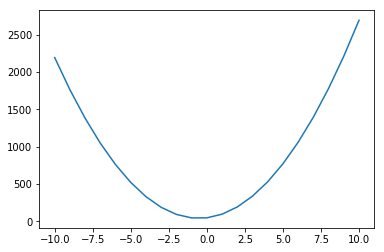

Basing on the graph showed, does the function have solutions? (Enter 0 for no solution): 2
Enter the [s1,s2] containing the solution:
- Enter s1: 5
- Enter s2: 6
5.999992370605469

NEWTON METHOD
Enter starting point: 5
Enter the maximum number of iterations: 4
Solution: None


In [3]:
n = int(input('Enter the degree of the function: '))
enterfx(n)
tol = 0.00001

print('\nINCREMENTAL SEARCH')
k1, solution1 = incrementalSearch(tol, n)
print('Solutions in the defined range: ' + str(printSolution(k1, solution1)))

print('\nBISECTION SEARCH')
x = numpy.linspace(-10, 10, 21)
y = f(n, x)
pylab.plot(x, y)
pylab.show()
pylab.close()
vn = int(input('Basing on the graph showed, does the function have solutions? (Enter 0 for no solution): '))

if vn != 0:
    print('Enter the [s1,s2] containing the solution:')
    s1 = float(input('- Enter s1: '))
    s2 = float(input('- Enter s2: '))
    print(str(bisectionSearch(s1, s2, tol, n)))

print('\nNEWTON METHOD')
epsilon = 0.00005
x1 = float(input("Enter starting point: "))
imax = int(input("Enter the maximum number of iterations: "))
print('Solution: ' + str(newtonmethod(x1, epsilon, n, imax)))
